# Hierarchial Clustering

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
data = pd.read_csv('poke.csv')

In [28]:
data.shape

(800, 13)

In [29]:
data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [30]:
x = data.iloc[:, [5, 8]].values
print(x.shape)
x

(800, 2)


array([[ 45,  65],
       [ 60,  80],
       [ 80, 100],
       ...,
       [ 80, 150],
       [ 80, 170],
       [ 80, 130]], dtype=int64)

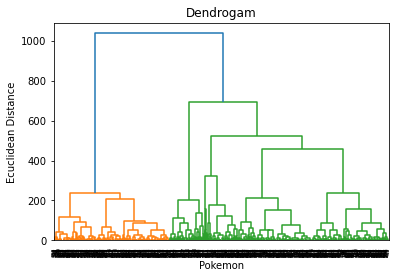

In [31]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogam')
plt.xlabel('Pokemon')
plt.ylabel('Ecuclidean Distance')
plt.show()

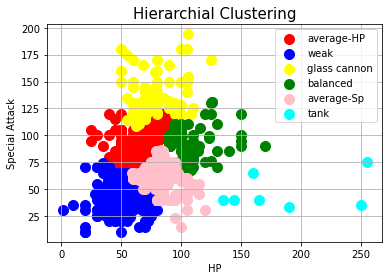

In [35]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'red', label = 'average-HP')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'blue', label = 'weak')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = 'yellow', label = 'glass cannon')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 100, c = 'green', label = 'balanced')
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s = 100, c = 'pink', label = 'average-Sp')
plt.scatter(x[y_hc == 5, 0], x[y_hc == 5, 1], s = 100, c = 'cyan', label = 'tank')

plt.title('Hierarchial Clustering', fontsize = 15)
plt.xlabel('HP')
plt.ylabel('Special Attack')
plt.legend()
plt.grid()
plt.show()

# Text Analysis and Topic Modelling

In [3]:
trump  = pd.read_csv('trump.csv')

In [4]:
trump.head()

,id,link,content,date,retweets,favorites,mentions,hashtags
0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 13:54:25,510,917,NaN,NaN
1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-04 20:00:10,34,267,NaN,NaN
2,1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 08:38:08,13,19,NaN,NaN
3,1741160716,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 15:40:15,11,26,NaN,NaN
4,1773561338,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",2009-05-12 09:07:28,1375,1945,NaN,NaN


In [5]:
trump = trump['content']
trump.head()

0    Be sure to tune in and watch Donald Trump on L...
1    Donald Trump will be appearing on The View tom...
2    Donald Trump reads Top Ten Financial Tips on L...
3    New Blog Post: Celebrity Apprentice Finale and...
4    "My persona will never be that of a wallflower...
Name: content, dtype: object

In [7]:
import re

# Remove punctuation
trump['trump_text_processed'] = \
trump.map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
trump['trump_text_processed'] = \
trump['trump_text_processed'].map(lambda x: x.lower())

# Print out the first rows of trump
trump['trump_text_processed'].head()

0    be sure to tune in and watch donald trump on l...
1    donald trump will be appearing on the view tom...
2    donald trump reads top ten financial tips on l...
3    new blog post: celebrity apprentice finale and...
4    "my persona will never be that of a wallflower...
Name: content, dtype: object

In [8]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pyparsing>=2.2.1 in d:\anaconda\lib\site-packages (from matplotlib->wordcloud) (3.0.4)



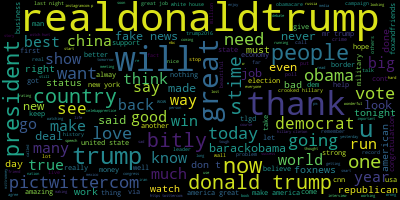

In [9]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(trump['trump_text_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="black", max_words=1000, contour_width=3, contour_color='yellow')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [10]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]


data = trump.trump_text_processed.values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['sure', 'tune', 'watch', 'donald', 'trump', 'late', 'night', 'david', 'letterman', 'presents', 'top', 'ten', 'list', 'tonight']


In [11]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1)]


In [12]:
from pprint import pprint

# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.016*"trump" + 0.011*"realdonaldtrump" + 0.010*"fake" + 0.009*"http" + '
  '0.007*"great" + 0.007*"like" + 0.006*"thank" + 0.005*"people" + 0.005*"one" '
  '+ 0.005*"really"'),
 (1,
  '0.025*"great" + 0.011*"realdonaldtrump" + 0.011*"new" + 0.007*"us" + '
  '0.007*"trump" + 0.007*"get" + 0.007*"http" + 0.006*"time" + 0.005*"want" + '
  '0.005*"job"'),
 (2,
  '0.015*"trump" + 0.014*"status" + 0.013*"twittercom" + 0.012*"great" + '
  '0.012*"realdonaldtrump" + 0.010*"http" + 0.008*"thanks" + 0.006*"thank" + '
  '0.006*"news" + 0.006*"people"'),
 (3,
  '0.014*"status" + 0.014*"twittercom" + 0.011*"great" + 0.009*"fake" + '
  '0.008*"people" + 0.008*"realdonaldtrump" + 0.008*"country" + 0.007*"https" '
  '+ 0.007*"total" + 0.007*"news"'),
 (4,
  '0.027*"realdonaldtrump" + 0.019*"status" + 0.019*"twittercom" + '
  '0.015*"pictwittercom" + 0.014*"thank" + 0.014*"trump" + 0.013*"great" + '
  '0.008*"president" + 0.006*"http" + 0.006*"thanks"'),
 (5,
  '0.018*"trump" + 0.011*"great" +

In [45]:
pip install pyLDAvis


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136882 sha256=3b0e7f948e80f63edac0bef982490d38015b8c9cc9c80ff11616fa38e3c258ad
  Stored in directory: c:\users\moham\appdata\local\pip\cache\wheels\57\a4\86\d10c6c2e0bf149fbc0afb0aa5a6528ac35b30a133a0270c477
Note: you may need to restart the kernel to use updated packages.
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=36a42720198ce12424d652560b31274f2235d8663fe1b269c333a7ac6abc9f25
  Stored in directory: c:\users\moham\appdata\local\pip\cache\wheels\e4\7b\

In [13]:
import pickle 
import pyLDAvis
import pyLDAvis.gensim_models

In [14]:
import os
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, './'+ str(num_topics) +'.html')

LDAvis_prepared

D:\Anaconda\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.039309 -0.058218       1        1  12.394191
1      0.012446  0.037304       2        1  12.285970
5      0.018537  0.028643       3        1  11.773252
3     -0.119742  0.020485       4        1  11.190684
6      0.001111 -0.034336       5        1  11.098044
8      0.041896 -0.002336       6        1   9.466938
9      0.042795 -0.010057       7        1   8.858456
2     -0.000471 -0.069802       8        1   8.468474
0      0.052415  0.008979       9        1   7.371200
7     -0.009679  0.079338      10        1   7.092793, topic_info=                  Term         Freq        Total Category  logprob  loglift
13356           status  3130.000000  3130.000000  Default  30.0000  30.0000
689         twittercom  3134.000000  3134.000000  Default  29.0000  29.0000
5133              fake  1256.000000  1256.000000  Default  28.0000  28.0000
8771     pictwittercom  1798.000000  1798.000000  Default  27.0000  27.0000
2916   realdonaldtrump  6798.000000  6798.000000  Default  26.0000  26.0000
...                ...          ...          ...      ...      ...      ...
2916   realdonaldtrump   170.868737  6798.770535  Topic10  -5.3700  -1.0375
22                 new   127.382025  2077.647165  Topic10  -5.6637  -0.1457
615               time   119.970068  1643.048928  Topic10  -5.7236   0.0290
932            america   115.046629  1614.979182  Topic10  -5.7655   0.0044
790              going   109.540458  1215.963998  Topic10  -5.8146   0.2391

[821 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
13074      1  0.064474  accurately
13074      8  0.064474  accurately
13074     10  0.838158  accurately
1869       1  0.327158     actions
1869       3  0.009622     actions
...      ...       ...         ...
101        6  0.040624        york
101        7  0.038858        york
101        8  0.058287        york
101        9  0.033559        york
101       10  0.058287        york

[2778 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 6, 4, 7, 9, 10, 3, 1, 8])